Pseudo code

<img src="images/bandit.png" style="float: left;" width="600">

Directions:

1) initialize state S

For every step of the episode:

2) choose action A by some exploratory policy (e.g. ϵ-greedy) from state S

3) take action A and observe R and S′

4) do the update Q(A) = α(R − Q(A))

5) update the state S=S′ and keep looping from step 2 until the end of episode

## Multi Armed Bandit Algorithm

In [1]:
import numpy as np


class MultiArmedBandit:
    """
    MultiArmedBandit reinforcement learning agent.

    Arguments:
      epsilon - (float) The probability of randomly exploring the action space
        rather than exploiting the best action.
    """

    def __init__(self, epsilon=0.2):
        self.epsilon = epsilon

    def fit(self, env, steps=1000):
        env.reset()

        action_values = np.zeros((env.action_space.n, ))
        N_actions_performed = np.zeros((env.action_space.n, ), dtype=int)
        rewards = np.zeros((100, ))

        s = np.floor(steps / 100)
        s_count = 0
        reward_sum = 0
        idx = 0

        for step in range(steps):
            # generate random num
            p = np.random.random()
            # check probability
            action = env.action_space.sample(
            )  # your agent here (this takes random actions)
            if p >= self.epsilon and len(set(action_values)) != 1:
                action = np.argmax(action_values)  # take highest Q action
            # bandit
            observation, reward, done, info = env.step(action)
            # update values
            N_actions_performed[action] += 1
            action_values[action] += 1 / N_actions_performed[action] * (
                reward - action_values[action])
            reward_sum += reward
            # check s
            s_count += 1
            if s == s_count:
                rewards[idx] = reward_sum / (step + 1)
                s_count = 0
                idx += 1

            if done:
                observation = env.reset()

        # done
        return np.repeat([action_values], env.observation_space.n,
                         axis=0), rewards

    def predict(self, env, state_action_values):
        states, actions, rewards = [], [], []

        env.reset()

        while True:
            action = np.argmax(state_action_values[0])  # take highest Q action
            # bandit
            observation, reward, done, info = env.step(action)
            # record data
            states.append(observation)
            actions.append(action)
            rewards.append(reward)

            if done:
                break

        return np.array(states), np.array(actions), np.array(rewards)

## Experiments

beginning trial 1
beginning trial 2
beginning trial 3
beginning trial 4
beginning trial 5
beginning trial 6
beginning trial 7
beginning trial 8
beginning trial 9
beginning trial 10


<IPython.core.display.Javascript object>


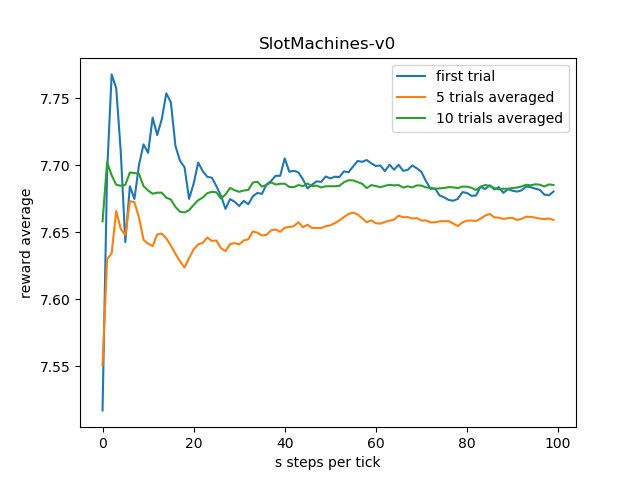

In [14]:
import gym
import slot_machines
%matplotlib notebook
import matplotlib.pyplot as plt

trials = []
env = gym.make('SlotMachines-v0')

for i in range(10):
    print(f'beginning trial {i + 1}')
    agent = MultiArmedBandit()
    action_values, rewards = agent.fit(env, steps = 100000)
    trials.append(rewards)

## plotting
plt.plot(trials[0], label='first trial')
plt.plot(np.average(trials[:5], axis=0), label='5 trials averaged')
plt.plot(np.average(trials[:10], axis=0), label='10 trials averaged')
plt.title('SlotMachines-v0')
plt.xlabel('s steps per tick')
plt.ylabel('reward average')
plt.legend()
plt.show()

beginning trial 1
beginning trial 2
beginning trial 3
beginning trial 4
beginning trial 5
beginning trial 6
beginning trial 7
beginning trial 8
beginning trial 9
beginning trial 10


<IPython.core.display.Javascript object>


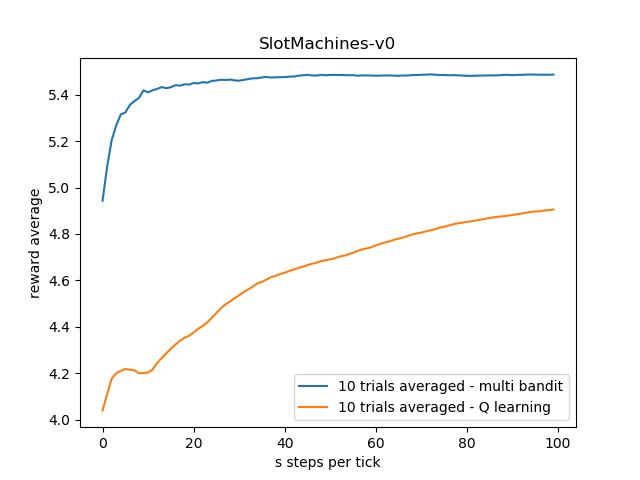

In [18]:
import gym
import slot_machines
%matplotlib notebook
import matplotlib.pyplot as plt
from learners.q_learning import QLearning


b_trials = []
q_trials = []
env = gym.make('SlotMachines-v0')

for i in range(10):
    print(f'beginning trial {i + 1}')
    agent = MultiArmedBandit()
    action_values, rewards = agent.fit(env, steps = 100000)
    b_trials.append(rewards)

    agent = QLearning()
    action_values, rewards = agent.fit(env, steps = 100000)
    q_trials.append(rewards)


## plotting
plt.title('SlotMachines-v0')
plt.plot(np.average(b_trials[:10], axis=0), label='10 trials averaged - multi bandit')
plt.plot(np.average(q_trials[:10], axis=0), label='10 trials averaged - Q learning')
plt.xlabel('s steps per tick')
plt.ylabel('reward average')
plt.legend()
plt.show()

beginning trial 1
beginning trial 2
beginning trial 3
beginning trial 4
beginning trial 5
beginning trial 6
beginning trial 7
beginning trial 8
beginning trial 9
beginning trial 10


<IPython.core.display.Javascript object>


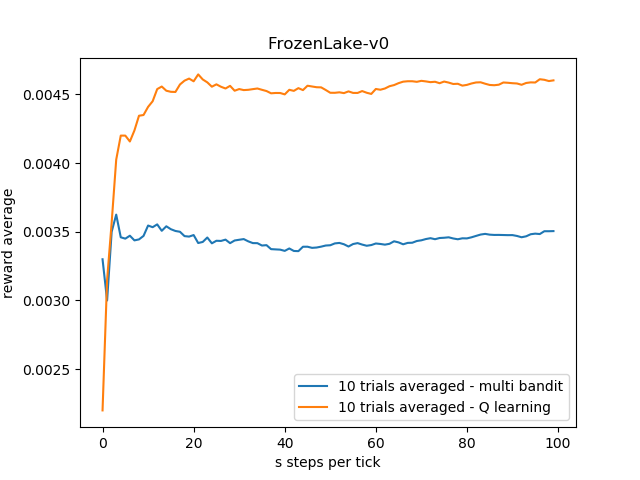

In [17]:
import gym
%matplotlib notebook
import matplotlib.pyplot as plt
from learners.q_learning import QLearning


b_trials = []
q_trials = []
env = gym.make('FrozenLake-v0')

for i in range(10):
    print(f'beginning trial {i + 1}')
    agent = MultiArmedBandit()
    action_values, rewards = agent.fit(env, steps = 100000)
    b_trials.append(rewards)

    agent = QLearning()
    action_values, rewards = agent.fit(env, steps = 100000)
    q_trials.append(rewards)


## plotting
plt.title('FrozenLake-v0')
plt.plot(np.average(b_trials[:10], axis=0), label='10 trials averaged - multi bandit')
plt.plot(np.average(q_trials[:10], axis=0), label='10 trials averaged - Q learning')
plt.xlabel('s steps per tick')
plt.ylabel('reward average')
plt.legend()
plt.show()